<a href="https://colab.research.google.com/github/rhapis97/Practice_AI/blob/main/ROC_Curve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [3]:
# roc curve function

def roc_curve_fig(fpr, tpr):  # false positive rate(민감도), true positive rate(특이도)
  plt.plot(fpr, tpr, color='yellow', label='ROC')
  plt.plot([0,1], [0,1], color='darkblue', linestyle='--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC CURVE')
  plt.legend()
  plt.show()

In [4]:
# number of sample = 1000

data_X, class_label = make_classification(n_samples=1000, n_classes=2, weights=[1,1], random_state=1)

In [5]:
train_X, test_X, train_y, test_y = train_test_split(data_X, class_label,
                                                    test_size = 0.2,
                                                    random_state = 1)

In [6]:
# 모델 생성

model = RandomForestClassifier()

model.fit(train_X, train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [7]:
# 모델 예측

prob = model.predict_proba(test_X)    # 퍼센트

In [8]:
prob[:, 1]    # positive class

array([0.04, 0.92, 0.01, 0.07, 0.93, 0.79, 0.75, 0.93, 0.85, 0.06, 0.75,
       0.97, 0.04, 0.83, 0.79, 0.05, 0.97, 0.05, 0.9 , 0.04, 0.12, 0.2 ,
       0.85, 0.91, 0.87, 0.88, 0.02, 0.86, 0.78, 0.9 , 0.  , 0.11, 0.82,
       0.74, 0.82, 0.1 , 0.04, 0.23, 0.95, 0.01, 0.01, 0.73, 0.  , 0.23,
       0.75, 0.06, 0.82, 0.92, 0.81, 0.08, 0.  , 0.66, 0.01, 0.05, 0.03,
       0.1 , 0.77, 0.89, 0.1 , 0.06, 0.57, 0.  , 0.94, 0.11, 0.05, 0.3 ,
       0.03, 0.39, 0.91, 0.52, 0.94, 0.02, 0.9 , 0.02, 0.06, 0.94, 0.02,
       0.97, 0.89, 0.84, 0.04, 0.07, 0.82, 0.9 , 0.23, 0.81, 0.  , 0.07,
       0.57, 0.71, 0.87, 0.9 , 0.55, 0.07, 0.91, 0.25, 0.93, 0.75, 0.03,
       0.03, 0.8 , 0.02, 0.79, 0.05, 0.05, 0.95, 0.05, 0.76, 0.43, 0.72,
       0.88, 0.02, 0.89, 0.84, 0.89, 0.95, 0.85, 0.03, 0.92, 0.  , 0.02,
       0.04, 0.01, 0.88, 0.77, 0.02, 0.78, 0.93, 0.84, 0.97, 0.85, 0.03,
       0.88, 0.83, 0.34, 0.78, 0.04, 0.83, 0.93, 0.81, 0.89, 0.64, 0.06,
       0.03, 0.92, 0.1 , 0.86, 0.27, 0.15, 0.82, 0.

In [9]:
probs = prob[:, 1]    # positive class

In [10]:
# AUC

auc = roc_auc_score(test_y, probs)

In [11]:
fpr, tpr, thresholds = roc_curve(test_y, probs)

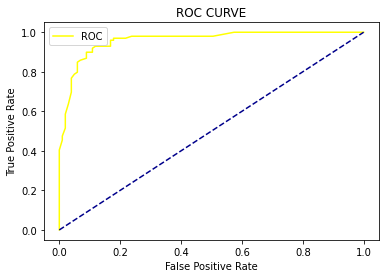

In [12]:
roc_curve_fig(fpr, tpr)

In [13]:
auc

0.9593459345934594